In [40]:
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

In [41]:
columns = ['preg_count', 'glucose', 'BP', 'skin_thick', 'insulin', 'BMI', 'pedigree', 'age', 'class']

df = pd.read_csv("food_coded.csv") 

df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,6.0,1.0,2,5.0,1165,500,none,5,1,900.0
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [42]:
df.dtypes

GPA                             float64
Gender                            int64
breakfast                         int64
calories_chicken                  int64
calories_day                    float64
calories_scone                  float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
cook                            float64
comfort_food_reasons_coded.1      int64
cuisine                         float64
diet_current                     object
diet_current_coded                int64
drink                           float64
eating_changes                   object
eating_changes_coded              int64
eating_changes_coded1             int64
eating_out                        int64
employment                      float64
ethnic_food                       int64
exercise                        float64
father_education                float64
father_profession                object


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
GPA                             121 non-null float64
Gender                          125 non-null int64
breakfast                       125 non-null int64
calories_chicken                125 non-null int64
calories_day                    106 non-null float64
calories_scone                  124 non-null float64
coffee                          125 non-null int64
comfort_food                    124 non-null object
comfort_food_reasons            124 non-null object
comfort_food_reasons_coded      106 non-null float64
cook                            122 non-null float64
comfort_food_reasons_coded.1    125 non-null int64
cuisine                         108 non-null float64
diet_current                    124 non-null object
diet_current_coded              125 non-null int64
drink                           123 non-null float64
eating_changes                  122 non-null object
eating_cha

In [44]:
df.memory_usage() 

Index                             80
GPA                             1000
Gender                          1000
breakfast                       1000
calories_chicken                1000
calories_day                    1000
calories_scone                  1000
coffee                          1000
comfort_food                    1000
comfort_food_reasons            1000
comfort_food_reasons_coded      1000
cook                            1000
comfort_food_reasons_coded.1    1000
cuisine                         1000
diet_current                    1000
diet_current_coded              1000
drink                           1000
eating_changes                  1000
eating_changes_coded            1000
eating_changes_coded1           1000
eating_out                      1000
employment                      1000
ethnic_food                     1000
exercise                        1000
father_education                1000
father_profession               1000
fav_cuisine                     1000
f

In [45]:
df.memory_usage().sum()

61080

In [46]:
df.describe()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,vitamins,waffle_calories,weight
count,121.000000,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.00000,125.000000,123.000000
mean,3.418653,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,...,2.790323,3.112903,1.258065,1.382114,3.312000,938.225806,560.360000,1.54400,1066.208000,165.073171
std,0.389998,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,...,1.410035,1.098481,0.596343,0.487892,1.433561,218.153926,161.753466,0.58893,266.111312,74.183111
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,345.000000,1.00000,1.000000,100.000000
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,1.00000,900.000000,135.000000
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,2.00000,900.000000,155.000000
75%,3.700000,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,2.00000,1315.000000,180.000000
max,4.000000,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,...,5.000000,6.000000,6.000000,2.000000,5.000000,1165.000000,1165.000000,5.00000,1315.000000,900.000000


In [47]:
df.mean()

GPA                                3.418653
Gender                             1.392000
breakfast                          1.112000
calories_chicken                 577.320000
calories_day                       3.028302
calories_scone                   505.241935
coffee                             1.752000
comfort_food_reasons_coded         2.698113
cook                               2.786885
comfort_food_reasons_coded.1       2.688000
cuisine                            1.388889
diet_current_coded                 1.760000
drink                              1.560976
eating_changes_coded               1.536000
eating_changes_coded1              4.552000
eating_out                         2.560000
employment                         2.448276
ethnic_food                        3.744000
exercise                           1.589286
father_education                   3.483871
fav_cuisine_coded                  2.424000
fav_food                           1.715447
fries                           

In [48]:
df['GPA'].mean()

3.418652892561982

In [49]:
df.var()

GPA                                 0.152099
Gender                              0.240258
breakfast                           0.100258
calories_chicken                17217.154839
calories_day                        0.408715
calories_scone                  53287.339365
coffee                              0.188000
comfort_food_reasons_coded          3.888949
cook                                1.078174
comfort_food_reasons_coded.1        3.651871
cuisine                             0.950156
diet_current_coded                  0.587097
drink                               0.248301
eating_changes_coded                0.573290
eating_changes_coded1               6.491226
eating_out                          1.296774
employment                          0.284258
ethnic_food                         1.385548
exercise                            0.442407
father_education                    1.455022
fav_cuisine_coded                   3.794581
fav_food                            0.828202
fries     

In [50]:
df.skew()

GPA                            -0.760312
Gender                          0.447837
breakfast                       2.490617
calories_chicken               -0.939993
calories_day                   -0.024004
calories_scone                  1.518726
coffee                         -1.181290
comfort_food_reasons_coded      2.033662
cook                            0.214566
comfort_food_reasons_coded.1    1.922052
cuisine                         3.156695
diet_current_coded              0.986436
drink                          -0.248781
eating_changes_coded            1.348879
eating_changes_coded1           1.554581
eating_out                      0.798656
employment                     -0.140786
ethnic_food                    -0.602791
exercise                        0.694102
father_education               -0.328818
fav_cuisine_coded               1.021124
fav_food                        0.597940
fries                           2.944077
fruit_day                      -0.962403
grade_level     

In [51]:
df.kurtosis()

GPA                              0.326311
Gender                          -1.828968
breakfast                        4.271264
calories_chicken                 0.088070
calories_day                    -0.499984
calories_scone                   0.537365
coffee                          -0.614648
comfort_food_reasons_coded       3.671915
cook                            -0.262530
comfort_food_reasons_coded.1     3.421385
cuisine                         10.465421
diet_current_coded               1.012401
drink                           -1.970418
eating_changes_coded             1.277732
eating_changes_coded1            1.907344
eating_out                      -0.140476
employment                      -1.240225
ethnic_food                     -0.635416
exercise                        -0.571329
father_education                -1.183623
fav_cuisine_coded                0.285869
fav_food                        -1.535405
fries                            6.775759
fruit_day                        0

In [52]:
df.min()

GPA                             2.2
Gender                            1
breakfast                         1
calories_chicken                265
calories_day                      2
calories_scone                  315
coffee                            1
comfort_food_reasons_coded        1
cook                              1
comfort_food_reasons_coded.1      1
cuisine                           1
diet_current_coded                1
drink                             1
eating_changes_coded              1
eating_changes_coded1             1
eating_out                        1
employment                        1
ethnic_food                       1
exercise                          1
father_education                  1
fav_cuisine_coded                 0
fav_food                          1
fries                             1
fruit_day                         1
grade_level                       1
greek_food                        1
healthy_feeling                   1
ideal_diet_coded            

In [53]:
df.max()

GPA                                                                        4
Gender                                                                     2
breakfast                                                                  2
calories_chicken                                                         720
calories_day                                                               4
calories_scone                                                           980
coffee                                                                     2
comfort_food_reasons_coded                                                 9
cook                                                                       5
comfort_food_reasons_coded.1                                               9
cuisine                                                                    6
diet_current_coded                                                         4
drink                                                                      2

In [54]:
df.median()

GPA                               3.5
Gender                            1.0
breakfast                         1.0
calories_chicken                610.0
calories_day                      3.0
calories_scone                  420.0
coffee                            2.0
comfort_food_reasons_coded        2.0
cook                              3.0
comfort_food_reasons_coded.1      2.0
cuisine                           1.0
diet_current_coded                2.0
drink                             2.0
eating_changes_coded              1.0
eating_changes_coded1             4.0
eating_out                        2.0
employment                        2.0
ethnic_food                       4.0
exercise                          1.0
father_education                  4.0
fav_cuisine_coded                 1.0
fav_food                          1.0
fries                             1.0
fruit_day                         5.0
grade_level                       2.0
greek_food                        4.0
healthy_feel

In [55]:
df.corr()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,vitamins,waffle_calories,weight
GPA,1.000000,-0.063216,-0.048959,0.142166,0.028633,-0.223359,-0.010420,-0.191917,-0.041383,-0.192791,...,0.001767,0.002879,0.062989,-0.059113,0.183889,0.033151,0.217675,-0.039008,0.022994,-0.044372
Gender,-0.063216,1.000000,0.130527,-0.098265,0.026548,0.154845,-0.032178,0.168593,0.312014,0.209109,...,-0.011029,-0.219114,-0.017918,-0.183214,-0.106597,0.235884,0.116704,-0.074200,0.159872,0.150277
breakfast,-0.048959,0.130527,1.000000,-0.029597,-0.112370,0.030659,-0.089756,0.017411,-0.005896,0.018233,...,-0.146334,-0.060108,0.102417,-0.018418,-0.113137,0.043376,-0.050393,0.059854,-0.024589,0.000375
calories_chicken,0.142166,-0.098265,-0.029597,1.000000,0.420089,0.062835,0.159031,-0.068259,-0.040738,-0.009311,...,-0.069232,0.037036,0.073924,-0.133985,0.070291,0.306777,0.410627,-0.108301,0.295135,0.045373
calories_day,0.028633,0.026548,-0.112370,0.420089,1.000000,0.167579,0.162121,0.018574,-0.035581,0.057909,...,0.083252,-0.048251,0.109412,-0.185856,0.117082,0.194106,0.277505,-0.185996,0.164773,0.170959
calories_scone,-0.223359,0.154845,0.030659,0.062835,0.167579,1.000000,0.137510,0.266756,0.139370,0.206879,...,-0.050984,-0.107676,-0.007172,0.006380,-0.239530,0.232043,-0.028218,-0.060973,0.350676,-0.011574
coffee,-0.010420,-0.032178,-0.089756,0.159031,0.162121,0.137510,1.000000,-0.051484,-0.102079,-0.055205,...,0.059679,0.058300,-0.094072,-0.005953,0.164410,0.035573,0.076599,-0.004295,0.051543,0.067444
comfort_food_reasons_coded,-0.191917,0.168593,0.017411,-0.068259,0.018574,0.266756,-0.051484,1.000000,0.041154,0.989180,...,0.076781,0.060106,-0.088384,0.187933,-0.023853,0.068535,-0.071964,-0.117239,0.109606,-0.087343
cook,-0.041383,0.312014,-0.005896,-0.040738,-0.035581,0.139370,-0.102079,0.041154,1.000000,0.031245,...,-0.100838,-0.085016,-0.134357,-0.064351,-0.099093,0.180798,-0.040019,-0.026042,0.108654,-0.082132
comfort_food_reasons_coded.1,-0.192791,0.209109,0.018233,-0.009311,0.057909,0.206879,-0.055205,0.989180,0.031245,1.000000,...,0.088888,-0.006160,-0.049284,0.144152,-0.008337,0.077619,-0.029245,-0.113103,0.108948,-0.084519


In [56]:
import seaborn as sns

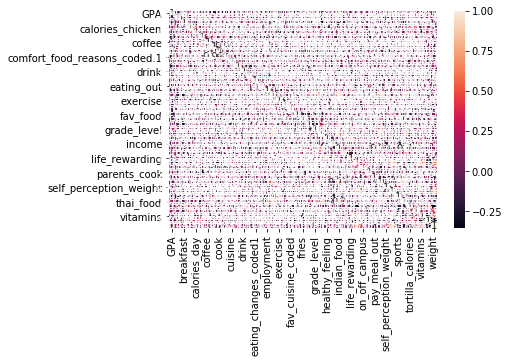

In [57]:
sns.heatmap(df.corr(), annot=True)

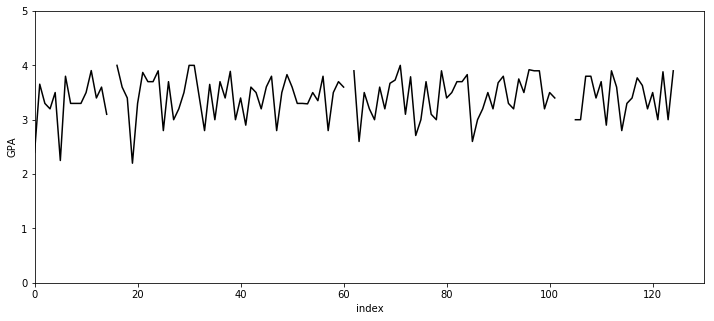

In [58]:
# Plotting with index along the x-axis
df['GPA'].plot(figsize=(12, 5), color='black') # color and figsize changed

plt.xlim(0, 130) # range for x-axis
plt.ylim(0, 5) # range for x-axis
plt.xlabel('index')
plt.ylabel('GPA'); # ";" prevents object info from displaying

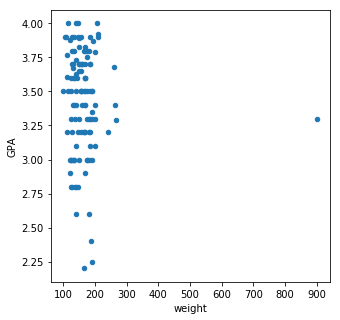

In [63]:
df.plot.scatter('weight', 'GPA', figsize=(5, 5))

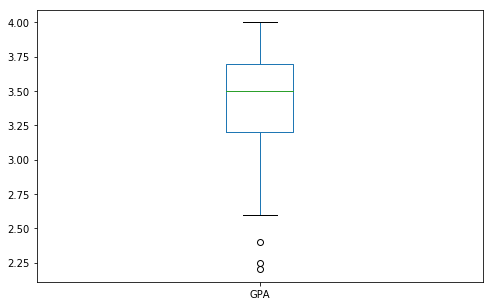

In [64]:
df['GPA'].plot.box(figsize=(8, 5));

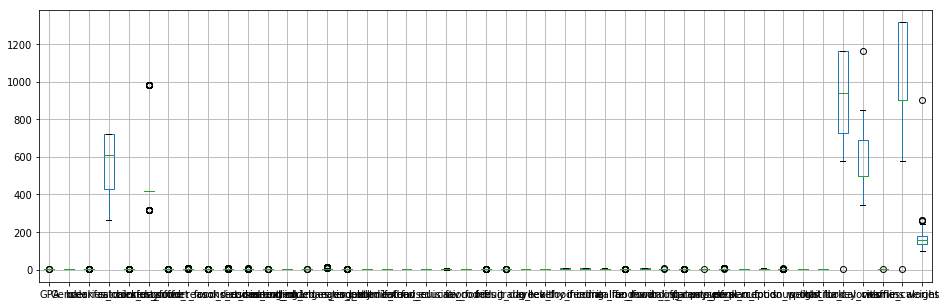

In [65]:
df.boxplot(figsize=(16, 5))

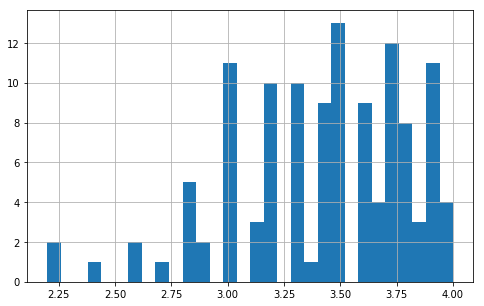

In [66]:
df['GPA'].hist(bins=30, figsize=(8, 5));

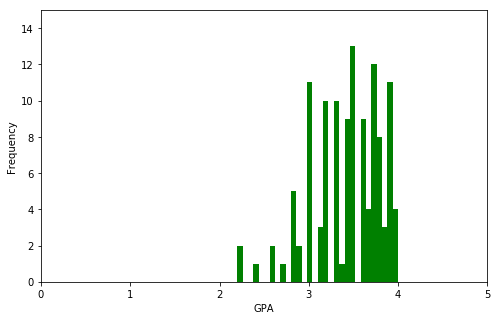

In [75]:
ax = df['GPA'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('GPA')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 5) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 15); # limiting display range to 0-120 for the y-axis

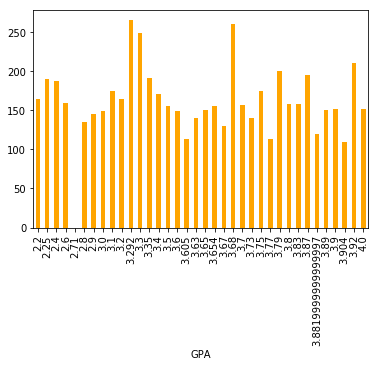

In [76]:
df_avg_BP = df.groupby('GPA')['weight'].mean()
df_avg_BP[:10].plot.bar(color='orange');

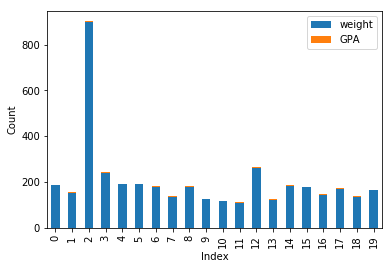

In [80]:
ax = df[['weight', 'GPA']][:20].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");